In [17]:
import csv
import math
import random
import nltk
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import itertools
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
import networkx as nx
import warnings
from nltk import bigrams
from textblob import TextBlob
from pandas import DataFrame

In [5]:
import pandas as pd
cols = ['sentiment','tweet']
df = pd.read_excel('D:/Work/NarendraModiData.xlsx',header = 0,names = cols)
df.head()

,sentiment,tweet
0,0,Prime Minister and Union Home Minister are lik...
1,0,RT Plzz help us PiyushGoyal NarendraModi ombir...
2,0,RT Tonight at 9PM Discovery ManVsWild Narendra...
3,-1,Man VS Wild with amp Random Reaction Discovery...
4,1,Are you ready NarendraModi BearGrylls NAMO Man...


In [6]:
#number of words
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split(" ")))
df[['tweet','word_count']].head()

,tweet,word_count
0,Prime Minister and Union Home Minister are lik...,14
1,RT Plzz help us PiyushGoyal NarendraModi ombir...,8
2,RT Tonight at 9PM Discovery ManVsWild Narendra...,7
3,Man VS Wild with amp Random Reaction Discovery...,16
4,Are you ready NarendraModi BearGrylls NAMO Man...,9


In [7]:
#number of characters
df['char_count'] = df['tweet'].str.len() ## this also includes spaces
df[['tweet','char_count']].head()

,tweet,char_count
0,Prime Minister and Union Home Minister are lik...,82.0
1,RT Plzz help us PiyushGoyal NarendraModi ombir...,59.0
2,RT Tonight at 9PM Discovery ManVsWild Narendra...,50.0
3,Man VS Wild with amp Random Reaction Discovery...,85.0
4,Are you ready NarendraModi BearGrylls NAMO Man...,64.0


In [8]:
#to find the average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
df['tweet'] = df['tweet'].astype(str)
df['avg_word'] = df['tweet'].apply(lambda x: avg_word(x))
df[['tweet','avg_word']].head()

,tweet,avg_word
0,Prime Minister and Union Home Minister are lik...,4.928571
1,RT Plzz help us PiyushGoyal NarendraModi ombir...,6.500000
2,RT Tonight at 9PM Discovery ManVsWild Narendra...,6.285714
3,Man VS Wild with amp Random Reaction Discovery...,4.375000
4,Are you ready NarendraModi BearGrylls NAMO Man...,6.222222


In [9]:
#Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet'].head()

0    Prime Minister Union Home Minister like Lord K...
1    RT Plzz help us PiyushGoyal NarendraModi ombir...
2      RT Tonight 9PM Discovery ManVsWild NarendraModi
3    Man VS Wild amp Random Reaction Discovery Indi...
4    Are ready NarendraModi BearGrylls NAMO ManVsWi...
Name: tweet, dtype: object

In [10]:
# Common word removal
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:10]
freq

NarendraModi    16256
RT              15732
BJP              8544
PM               4215
Kashmir          3733
India            2777
Minister         2431
AmitShah         2189
Modi             2077
one              2042
dtype: int64

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(df['tweet'].dropna().values.astype('U')) ## Even astype(str) would work

<26719x11084 sparse matrix of type '<class 'numpy.float64'>'
	with 307369 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.model_selection import train_test_split
X = df.tweet
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,random_state = 0)
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),(len(X_train[y_train == -1]) / (len(X_train)*1.))*100,(len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

Train set has total 18703 entries with 12.61% negative, 36.10% positive


In [13]:
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),(len(X_test[y_test == -1]) / (len(X_test)*1.))*100,(len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Test set has total 8016 entries with 12.54% negative, 36.66% positive


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [15]:
import numpy as np
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3),stop_words=None)

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 95.81%
Test result for 20000 features
accuracy score: 96.00%
Test result for 30000 features
accuracy score: 95.72%


              precision    recall  f1-score   support

    negative       0.97      0.88      0.92      1005
    positive       0.94      0.99      0.97      4072
     neutral       0.99      0.94      0.96      2939

    accuracy                           0.96      8016
   macro avg       0.97      0.94      0.95      8016
weighted avg       0.96      0.96      0.96      8016

accuracy score
0.9600798403193613


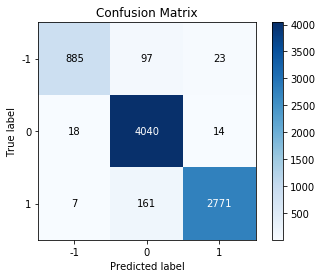

In [18]:
from sklearn.metrics import classification_report, accuracy_score
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', tfidf),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
df = print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2359
    positive       1.00      1.00      1.00      9592
     neutral       1.00      1.00      1.00      6752

    accuracy                           1.00     18703
   macro avg       1.00      1.00      1.00     18703
weighted avg       1.00      1.00      1.00     18703

accuracy score
0.9983959792546651


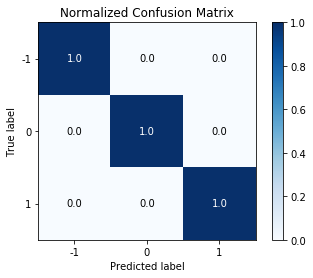

In [69]:
from sklearn.metrics import classification_report, accuracy_score
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', tfidf),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_train)
df = print(classification_report(y_train, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_train, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train, y_pred, normalize=True)
plt.show()

C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


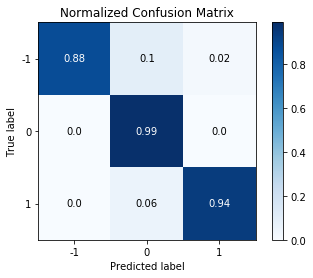

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(random_forest_clf, X, y)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

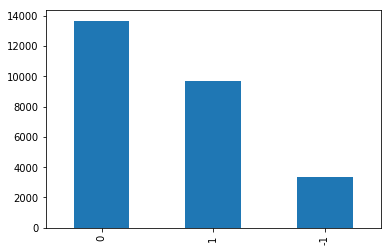

In [66]:
import pandas as pd
#cols = ['sentiment','tweet']
df = pd.read_excel('D:/Work/NarendraModiData.xlsx')
df.head(20)
#import numpy as np
df['Sentiment'].value_counts().plot(kind='bar')

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [31]:
cv = CountVectorizer()
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
accuracy score: 90.31%
Test result for 20000 features
accuracy score: 91.94%
Test result for 30000 features
accuracy score: 92.29%


              precision    recall  f1-score   support

    negative       0.82      0.82      0.82      1005
    positive       0.91      0.94      0.92      4072
     neutral       0.93      0.89      0.91      2939

    accuracy                           0.90      8016
   macro avg       0.88      0.88      0.88      8016
weighted avg       0.90      0.90      0.90      8016

accuracy score
0.903692614770459


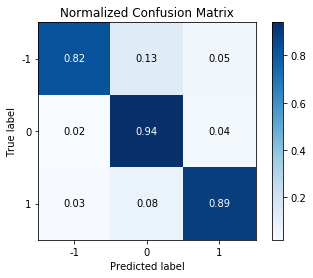

In [71]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [74]:
cv = CountVectorizer()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
accuracy score: 95.88%
Test result for 20000 features
accuracy score: 96.62%
Test result for 30000 features
accuracy score: 96.86%


              precision    recall  f1-score   support

    negative       0.94      0.92      0.93      1005
    positive       0.97      0.98      0.98      4072
     neutral       0.98      0.97      0.98      2939

    accuracy                           0.97      8016
   macro avg       0.96      0.96      0.96      8016
weighted avg       0.97      0.97      0.97      8016

accuracy score
0.971307385229541


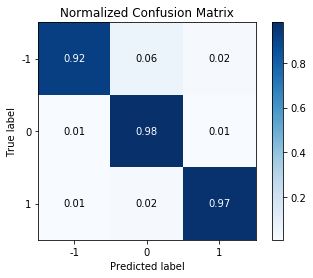

In [76]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', svc)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))
print("accuracy score")
print(accuracy_score(y_test, y_pred))
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 93.01%
model is 42.22% more accurate than null accuracy
train and test time: 0.83%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 93.06%
model is 42.27% more accurate than null accuracy
train and test time: 0.61%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 93.06%
model is 42.27% more accurate than null accuracy
train and test time: 0.59%
--------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 91.60%
model is 40.81% more accurate than null accuracy
train and test time: 1.05%
---------------------------

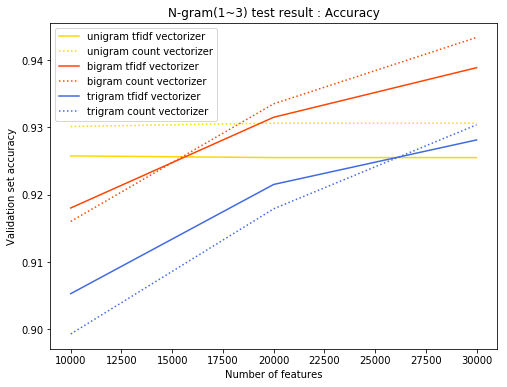

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.80%
accuracy score: 96.18%
model is 45.38% more accurate than null accuracy
train and test time: 6.39%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 96.36%
model is 45.56% more accurate than null accuracy
train and test time: 2.36%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 96.53%
model is 45.73% more accurate than null accuracy
train and test time: 1.29%
--------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_wei

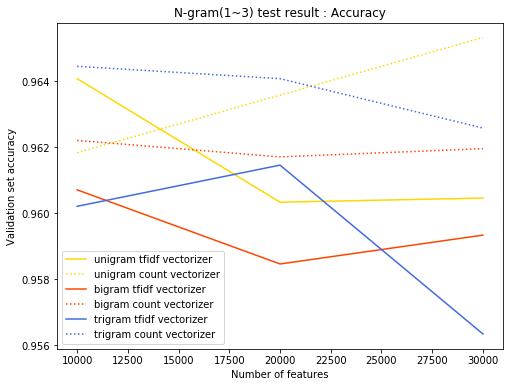

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 97.48%
model is 46.68% more accurate than null accuracy
train and test time: 22.17%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 97.49%
model is 46.69% more accurate than null accuracy
train and test time: 21.56%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 97.49%
model is 46.69% more accurate than null accuracy
train and test time: 21.44%
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

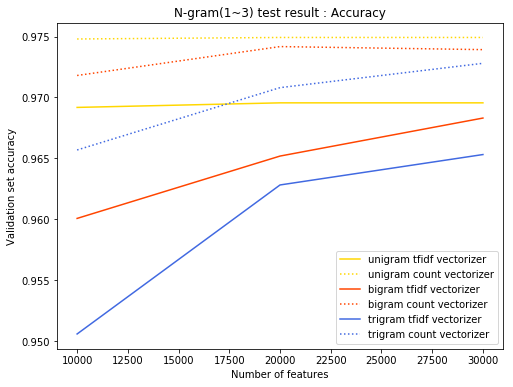

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "RandomForestClassifier","Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),RandomForestClassifier(class_weight="balanced"),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,clf_accuracy,tt_time))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 50.80%
accuracy score: 94.21%
model is 43.41% more accurate than null accuracy
train and test time: 2.98%
--------------------------------------------------------------------------------
Validation result for RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.80%
accuracy score: 95.38%
model is 44.59% more accurate than null accuracy
train and test time: 4.55%
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
null accuracy: 50.80%
accuracy score: 97.38%
model is 46.58% more accurate than null accuracy
train and test time: 2.88%
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercep

C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 50.80%
accuracy score: 95.77%
model is 44.97% more accurate than null accuracy
train and test time: 6.17%
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 50.80%
accuracy score: 95.02%
model is 44.22% more accurate than null accuracy
train and test time: 1.88%
--------------------------------------------------------------------------------
Validation result for Bernoulli NB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
null accuracy: 50.80%
accuracy score: 95.21%
model is 44.41% more accurate than null accuracy
train and test time: 2.05%
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
       

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf21 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1),('rf', clf2), ('svc', clf21), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2,clf21, clf3, clf4, clf5, eclf], ['Logistic Regression','Random Forest', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print ("Validation result for {}".format(label))
    print (clf)
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 12.54%
accuracy score: 94.21%
model is 81.67% more accurate than null accuracy
train and test time: 3.08s
--------------------------------------------------------------------------------
Validation result for Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 12.54%
accuracy score: 95.48%
model is 82.95% more accurate than null accuracy
train and test time: 3.63s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
null accuracy: 12.54%
accuracy score: 97.38%
model is 84.84% more accurate than null accuracy
train and test time: 2.94s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 12.54%
accuracy score: 95.02%
model is 82.49% more accurate than null accuracy
train and test time: 1.97s
--------------------------------------------------------------------------------
Validation result for Ridge Classif

C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 12.54%
accuracy score: 97.07%
model is 84.53% more accurate than null accuracy
train and test time: 7.71s
--------------------------------------------------------------------------------


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
def build_lda(X_train, num_topics=50):
    vec = CountVectorizer()
    transformed_X_train = vec.fit_transform(X_train)
    feature_names = vec.get_feature_names()
    lda = LatentDirichletAllocation(
        n_components=num_topics, max_iter=5, 
        learning_method='online', random_state=0)
    lda.fit(transformed_X_train)
    return lda, vec, feature_names

def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)
lda_model, vec, feature_names = build_lda(X_train)
display_word_distribution(
    model=lda_model, feature_names=feature_names, 
    n_word=5)

Topic 0:
['minister', 'prime', 'narendramodi', 'to', 'leader']
Topic 1:
['heart', 'international', 'lal', 'south', 'kar']
Topic 2:
['is', 'yo', 'recruitment', 'applied', 'narendratrump']
Topic 3:
['bjp', 'was', 'news', 'mr', 'rt']
Topic 4:
['narendramodi', 'and', 'pm', 'my', 'rt']
Topic 5:
['on', 'of', 'out', 'the', 'narendramodi']
Topic 6:
['who', 'are', 'to', 'there', 'people']
Topic 7:
['as', 'pakistan', 'for', 'rss', 'the']
Topic 8:
['this', 'that', 'rt', 'media', 'president']
Topic 9:
['condition', 'thakur', 'zero', 'mai', 'newdelhi']
Topic 10:
['narendramodi', 'rt', 'the', 'of', 'ji']
Topic 11:
['indian', 'narendramodi', 'to', 'its', 'in']
Topic 12:
['in', 'bjp', 'how', 'and', 'rt']
Topic 13:
['narendramodi', 'rt', 'us', 'help', 'in']
Topic 14:
['era', 'start', 'writes', 'bharatiya', 'con']
Topic 15:
['narendramodi', 'he', 'of', 'rt', 'is']
Topic 16:
['rt', 'and', 'very', 'narendramodi', 'are']
Topic 17:
['rt', 'narendramodi', 'the', 'by', 'bjp']
Topic 18:
['be', 'not', 'is', 'go

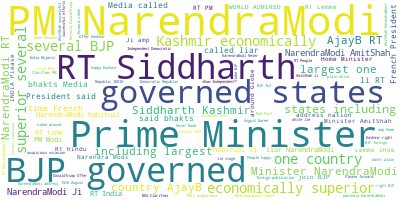

In [9]:
import pandas as pd
cols = ['sentiment','tweet']
df = pd.read_excel('D:/Work/NarendraModiData.xlsx',header = 0,names = cols)
df.head()
df['tweet'] = df['tweet'].astype(str)
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

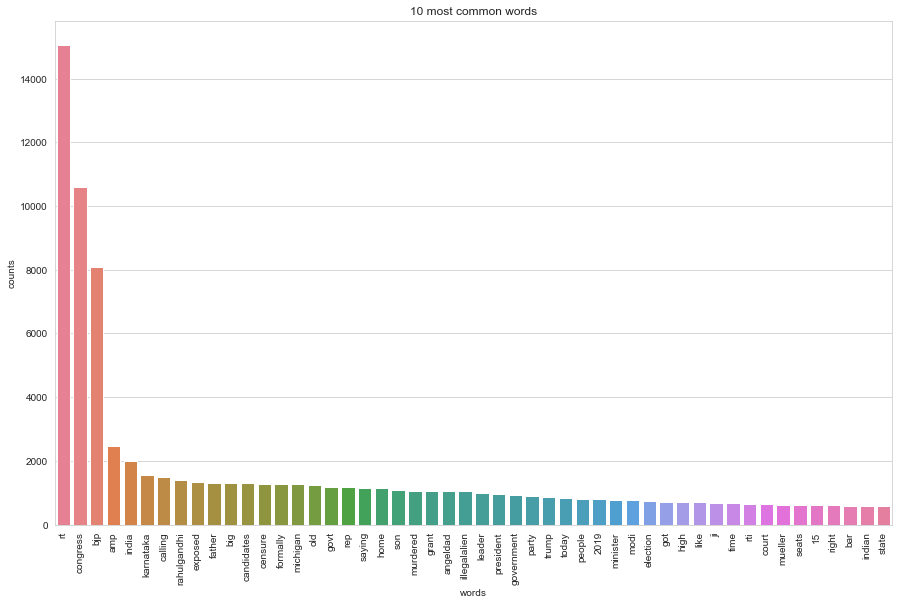

In [78]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['tweet'])
# Visualise the 10 most common words
plot_50_most_common_words(count_data, count_vectorizer)

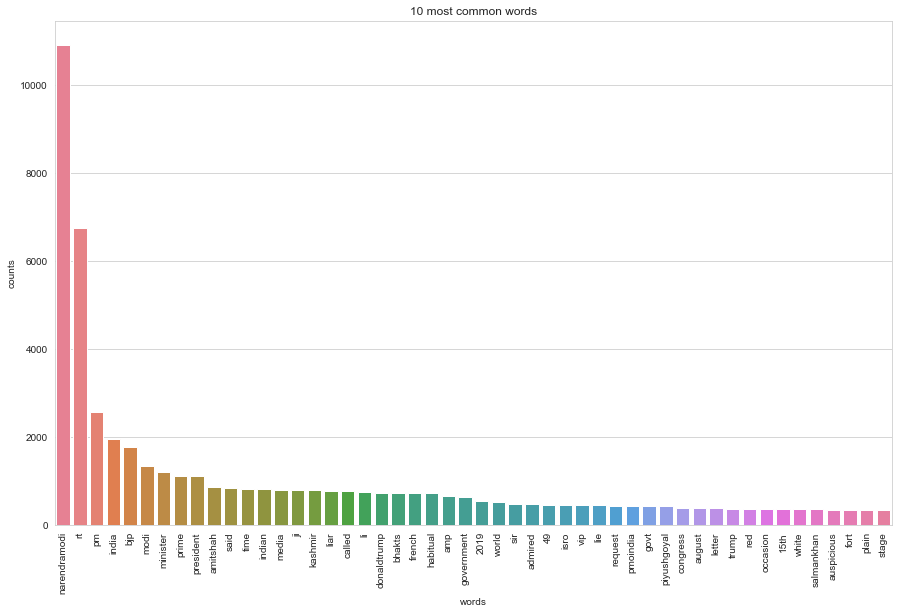

In [54]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['tweet'])
# Visualise the 10 most common words
plot_50_most_common_words(count_data, count_vectorizer)

In [55]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
narendramodi rt bjp amitshah vip india pm right minister security

Topic #1:
narendramodi rt president said time media liar called li bhakts

Topic #2:
narendramodi pm rt kashmir donaldtrump india modi request mea offer

Topic #3:
rt narendramodi lie august pm red occasion 15th white fort

Topic #4:
narendramodi rt india piyushgoyal pm amitshah ji amp power bjp


In [56]:
import gensim
from gensim import corpora
from gensim import models
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel,TfidfModel
from gensim.models.wrappers import LdaMallet
mydict = corpora.Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]
ldamodel = LdaModel(corpus=corpus, num_topics=50, id2word=mydict)

In [57]:
import pyLDAvis.gensim

In [58]:
pyLDAvis.enable_notebook()

In [59]:
pyLDAvis.gensim.prepare(ldamodel, corpus, mydict)

C:\Users\raghu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
20    -0.206187  0.062064       1        1  7.888600
25    -0.093210 -0.254651       2        1  3.735975
46     0.102518  0.097884       3        1  3.297030
49    -0.056096  0.106802       4        1  2.808989
21     0.028600  0.043983       5        1  2.707063
36    -0.168080  0.128626       6        1  2.672499
35     0.095965 -0.061197       7        1  2.615335
2     -0.157268 -0.065390       8        1  2.527722
27     0.215106 -0.114317       9        1  2.503944
28    -0.033194  0.038796      10        1  2.433334
6      0.118841 -0.100640      11        1  2.317772
15    -0.005805  0.091369      12        1  2.231236
14     0.011111  0.081331      13        1  2.186135
30    -0.150432 -0.043605      14        1  2.161507
5     -0.023616  0.104493      15        1  2.121250
9     -0.060458  0.012435      16        1  2.108959
10     0.074998  0.044016      17        1  2.077401
23    -0.243347 -0.231026      18        1  2.061277
33    -0.090329  0.015331      19        1  2.053501
45     0.130643  0.036902      20        1  2.035252
3      0.032876 -0.056843      21        1  1.986341
44    -0.017126  0.030606      22        1  1.977446
19    -0.082558  0.001523      23        1  1.866942
31     0.064369  0.069736      24        1  1.864171
8      0.118818 -0.020222      25        1  1.858724
26     0.072442 -0.057598      26        1  1.793801
13     0.050097  0.064715      27        1  1.763167
22     0.066573  0.075270      28        1  1.690618
11    -0.045302  0.014545      29        1  1.599808
43     0.095193 -0.163364      30        1  1.570135
38    -0.110492  0.045371      31        1  1.561694
24     0.011791  0.018498      32        1  1.540577
12     0.039111  0.096688      33        1  1.504986
47     0.027438 -0.038911      34        1  1.500919
42    -0.083428  0.086814      35        1  1.484629
0     -0.032316  0.024212      36        1  1.484304
7      0.018252  0.072599      37        1  1.472899
17    -0.011346 -0.076936      38        1  1.465190
40     0.065813 -0.028336      39        1  1.411737
4      0.068509 -0.052322      40        1  1.394683
1     -0.064015 -0.008874      41        1  1.363271
29    -0.006731 -0.136318      42        1  1.361907
39    -0.007103 -0.013155      43        1  1.309561
16     0.114644 -0.031132      44        1  1.307786
32     0.034959 -0.020027      45        1  1.264540
48    -0.001722  0.017772      46        1  1.235781
37     0.041272  0.007328      47        1  1.233055
41     0.014210  0.060564      48        1  1.209287
34    -0.011414  0.026398      49        1  1.204087
18     0.047429 -0.001809      50        1  1.173178, topic_info=     Category          Freq             Term         Total  loglift  logprob
30    Default  10775.000000              the  10775.000000  30.0000  30.0000
52    Default  12831.000000     narendramodi  12831.000000  29.0000  29.0000
24    Default   5039.000000               is   5039.000000  28.0000  28.0000
65    Default   1855.000000             modi   1855.000000  27.0000  27.0000
45    Default   7011.000000               to   7011.000000  26.0000  26.0000
38    Default   2647.000000          kashmir   2647.000000  25.0000  25.0000
2     Default   6839.000000              bjp   6839.000000  24.0000  24.0000
10    Default   6388.000000               of   6388.000000  23.0000  23.0000
22    Default   6144.000000               in   6144.000000  22.0000  22.0000
96    Default   3401.000000               pm   3401.000000  21.0000  21.0000
16    Default   3965.000000              and   3965.000000  20.0000  20.0000
195   Default   1549.000000         amitshah   1549.000000  19.0000  19.0000
23    Default   2889.000000            india   2889.000000  18.0000  18.0000
105   Default   3191.000000               on   3191.000000  17.0000  17.0000
37    Default   1109.000000        including  

Positive words


C:\Users\raghu\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


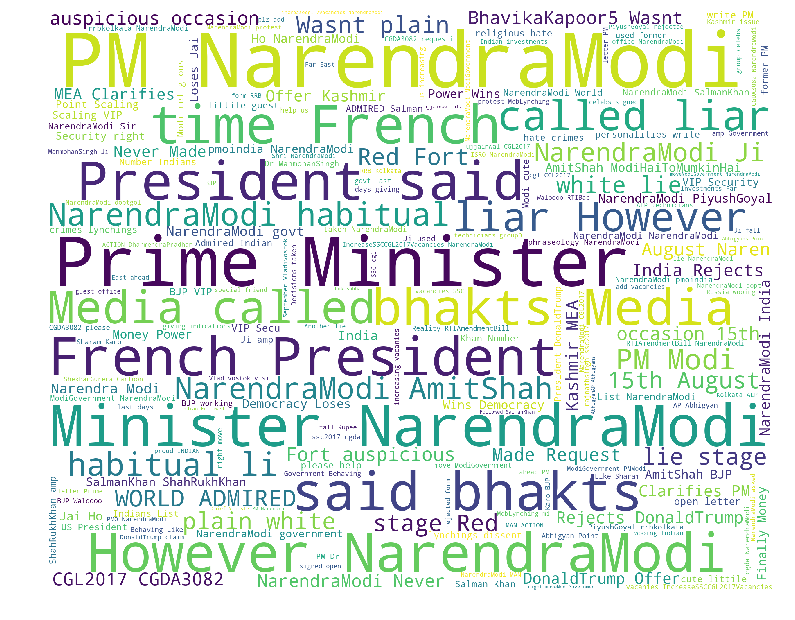

Negative words


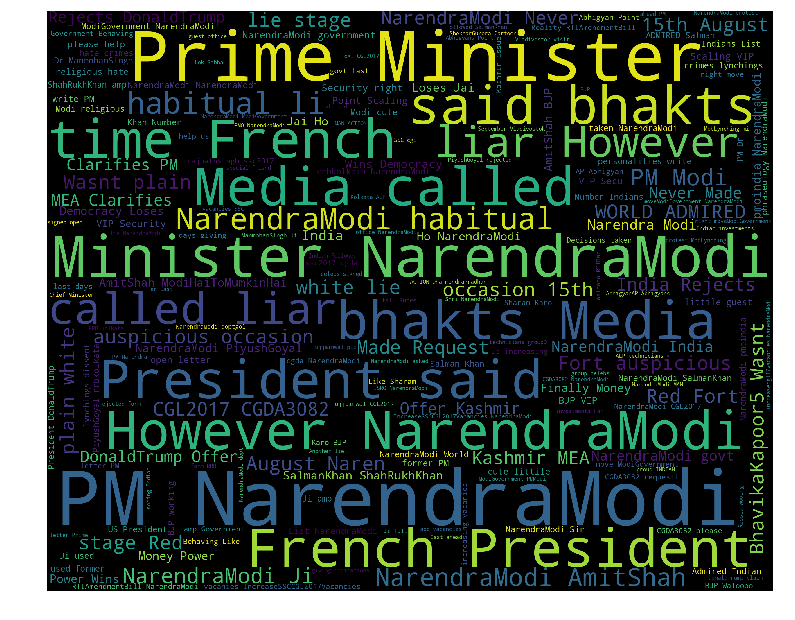

In [60]:
from nltk.corpus import stopwords
chachedWords = stopwords.words('english')
from nltk.corpus import stopwords

data = df[['sentiment','tweet']]

# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.3)
# Removing neutral sentiments
train = train[train.sentiment != "0"]

train_pos = train[ train['sentiment'] == '1']
train_pos = train['tweet']
train_neg = train[ train['sentiment'] == '-1']
train_neg = train['tweet']



def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords = chachedWords,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [61]:
mydict = corpora.Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]

from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.20752297303453482),
 (1, 0.10442859237280212),
 (2, 0.09080456641800871),
 (3, 0.3473197516729723),
 (4, 0.12244045075199662),
 (5, 0.3473197516729723),
 (6, 0.265896184396726),
 (7, 0.2988744093052977),
 (8, 0.3758096427586937),
 (9, 0.18432625889609533),
 (10, 0.10725638495494344),
 (11, 0.33065423373819525),
 (12, 0.15535223707084192),
 (13, 0.26450275520597766),
 (14, 0.32431829787603),
 (15, 0.16180062778998214)]


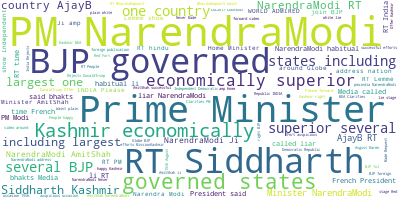

In [72]:
import pandas as pd
cols = ['sentiment','tweet']
df = pd.read_excel('D:/Work/NarendraModiData.xlsx',header = None,names = cols)
df.head(20)
df['tweet'] = df['tweet'].astype(str)
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [63]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == '1']
test_pos = test_pos['tweet']
test_neg = test[ test['sentiment'] == '-1']
test_neg = test_neg['tweet']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords = chachedWords,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [64]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

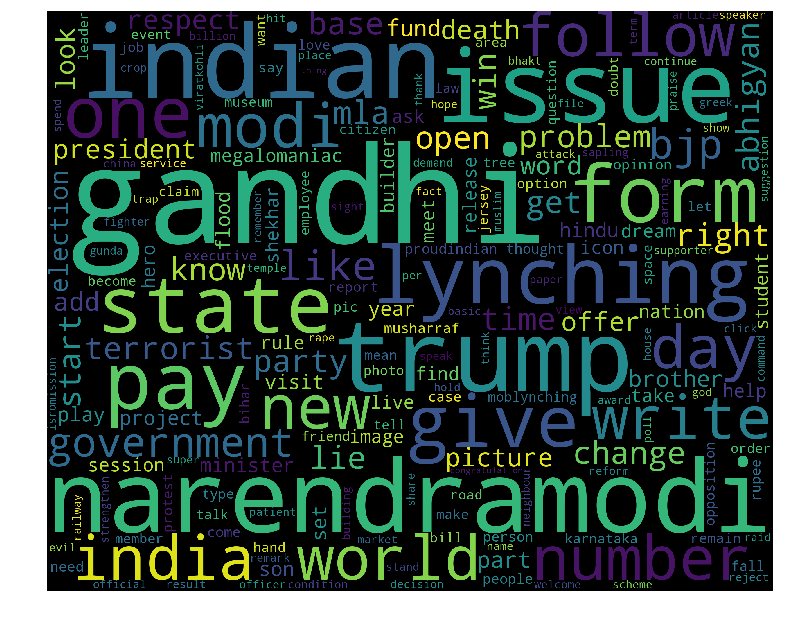

In [65]:
wordcloud_draw(w_features)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [67]:
import numpy as np
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tf = TfidfVectorizer(input='X_train', analyzer='word', ngram_range=(1,3),
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 95.78%
Test result for 20000 features
accuracy score: 95.21%
Test result for 30000 features
accuracy score: 95.73%


In [43]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=40000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))

              precision    recall  f1-score   support

    negative       0.99      0.88      0.93      1005
    positive       0.94      1.00      0.97      4072
     neutral       0.99      0.94      0.97      2939

    accuracy                           0.96      8016
   macro avg       0.97      0.94      0.96      8016
weighted avg       0.97      0.96      0.96      8016



In [69]:
import numpy as np
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tf = TfidfVectorizer(input='X_train', analyzer='word', ngram_range=(1,3),
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy score: 95.51%
Test result for 20000 features
accuracy score: 95.96%
Test result for 30000 features
accuracy score: 95.17%


In [70]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))

              precision    recall  f1-score   support

    negative       0.98      0.89      0.93      1005
    positive       0.94      1.00      0.97      4072
     neutral       0.99      0.95      0.97      2939

    accuracy                           0.96      8016
   macro avg       0.97      0.95      0.96      8016
weighted avg       0.97      0.96      0.96      8016



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 93.14%
model is 42.34% more accurate than null accuracy
train and test time: 0.50%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 93.19%
model is 42.39% more accurate than null accuracy
train and test time: 0.46%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 93.19%
model is 42.39% more accurate than null accuracy
train and test time: 0.53%
--------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 91.59%
model is 40.79% more accurate than null accuracy
train and test time: 0.92%
---------------------------

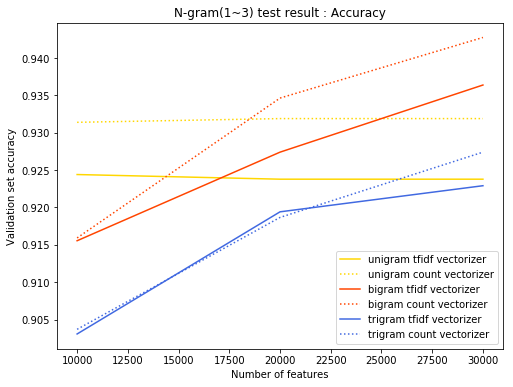

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.80%
accuracy score: 96.49%
model is 45.70% more accurate than null accuracy
train and test time: 1.32%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 96.11%
model is 45.31% more accurate than null accuracy
train and test time: 1.38%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 96.06%
model is 45.26% more accurate than null accuracy
train and test time: 1.30%
--------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_wei

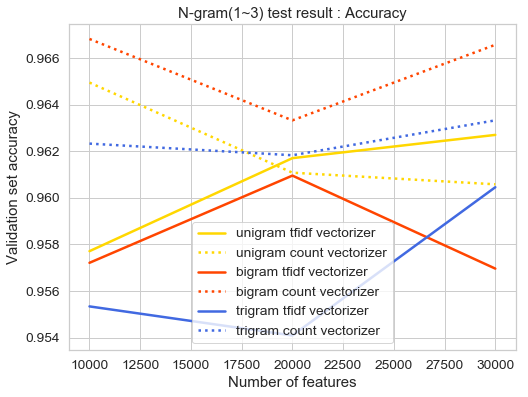

In [74]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [75]:
#Naive Bayes Classifier:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [76]:
import numpy as np
cv = CountVectorizer()
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result
tf = TfidfVectorizer(input='X_train', analyzer='word', ngram_range=(1,3),
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
accuracy score: 90.31%
Test result for 20000 features
accuracy score: 91.94%
Test result for 30000 features
accuracy score: 92.29%


In [77]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))

              precision    recall  f1-score   support

    negative       0.98      0.90      0.94      1005
    positive       0.95      1.00      0.97      4072
     neutral       0.99      0.95      0.97      2939

    accuracy                           0.97      8016
   macro avg       0.97      0.95      0.96      8016
weighted avg       0.97      0.97      0.97      8016



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 93.01%
model is 42.22% more accurate than null accuracy
train and test time: 0.40%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 93.06%
model is 42.27% more accurate than null accuracy
train and test time: 0.37%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 93.06%
model is 42.27% more accurate than null accuracy
train and test time: 0.38%
--------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 91.60%
model is 40.81% more accurate than null accuracy
train and test time: 0.75%
---------------------------

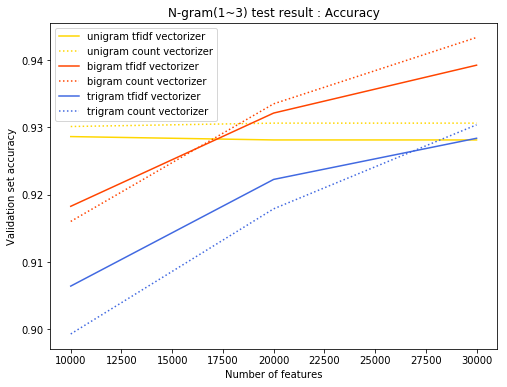

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 12.54%
accuracy score: 93.14%
model is 80.60% more accurate than null accuracy
train and test time: 8.35%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 12.54%
accuracy score: 93.19%
model is 80.65% more accurate than null accuracy
train and test time: 1.27%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 12.54%
accuracy score: 93.19%
model is 80.65% more accurate than null accuracy
train and test time: 1.09%
--------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 12.54%
accuracy score: 91.59%
model is 79.05% more accurate than null accuracy
train and test time: 1.78%
---------------------------

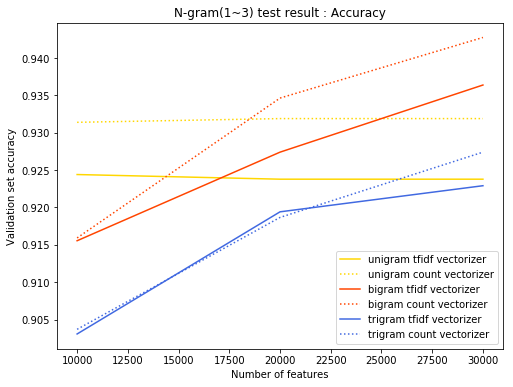

In [70]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == -1]) / (len(x_test)*1.) > 0.005:
        null_accuracy = len(x_test[y_test == -1]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
cv = CountVectorizer()
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result



feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 97.48%
model is 46.68% more accurate than null accuracy
train and test time: 21.81%
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 97.49%
model is 46.69% more accurate than null accuracy
train and test time: 21.44%
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 97.49%
model is 46.69% more accurate than null accuracy
train and test time: 21.93%
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

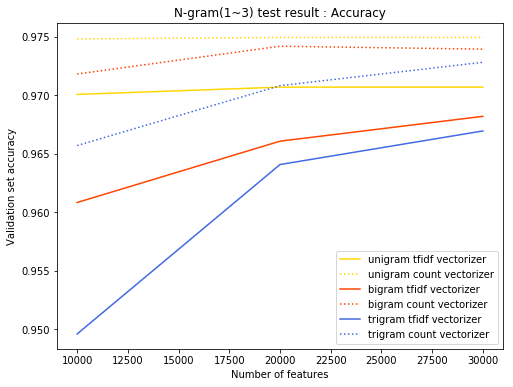

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from time import time


def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
cvec = CountVectorizer()
#lr = LogisticRegression()
nb = MultinomialNB()
n_features = np.arange(10000,100001,10000)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english',ngram_range=(1, 3))

RESULT FOR UNIGRAM WITHOUT STOP WORDS

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Validation result for 10000 features
null accuracy: 50.80%
accuracy score: 89.80%
model is 39.00% more accurate than null accuracy
train and test time: 1.10s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.80%
accuracy score: 91.82%
model is 41.02% more accurate than null accuracy
train and test time: 1.05s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.80%
accuracy score: 92.96%
model is 42.17% more accurate than null accuracy
train and test time: 1.08s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.80%
accuracy score: 93.60%
model is 42.80% more accurate than null accuracy
train and test time: 1.16s
-------------------------

In [80]:
from sklearn.metrics import classification_report
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative','positive','neutral']))

              precision    recall  f1-score   support

    negative       0.82      0.82      0.82      1005
    positive       0.91      0.94      0.92      4072
     neutral       0.93      0.89      0.91      2939

    accuracy                           0.90      8016
   macro avg       0.88      0.88      0.88      8016
weighted avg       0.90      0.90      0.90      8016



In [81]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

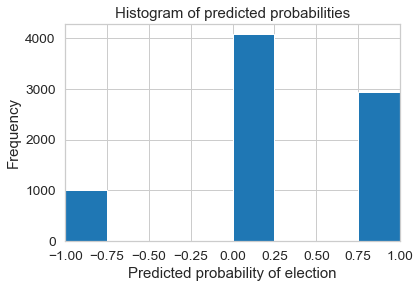

In [82]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_test, bins=8)

# x-axis limit from 0 to 1
plt.xlim(-1,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of election')
plt.ylabel('Frequency')

In [83]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from time import time


def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
cvec = CountVectorizer()
#lr = LogisticRegression()
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,100001,10000)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english',ngram_range=(1, 3))#Very slow execution.

RESULT FOR UNIGRAM WITHOUT STOP WORDS

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Validation result for 10000 features
null accuracy: 50.80%
accuracy score: 96.06%
model is 45.26% more accurate than null accuracy
train and test time: 27.24s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.80%
accuracy score: 96.62%
model is 45.82% more accurate than null accuracy
train and test time: 28.44s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.80%
accuracy score: 96.86%
model is 46.06% more accurate than null accuracy
train and test time: 31.47s
------------------------------------------------------------------------

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 12.54%
accuracy score: 98.18%
model is 85.64% more accurate than null accuracy
train and test time: 29.26s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 12.54%
accuracy score: 98.14%
model is 85.60% more accurate than null accuracy
train and test time: 27.26s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 12.54%
accuracy score: 98.14%
model is 85.60% more accurate than null accuracy
train and test time: 27.37s
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

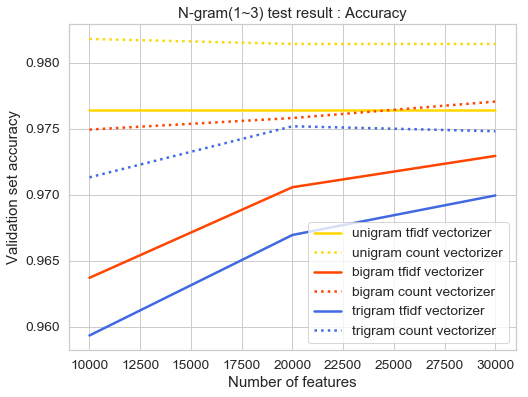

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == -1]) / (len(x_test)*1.) > 0.005:
        null_accuracy = len(x_test[y_test == -1]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=True,smooth_idf=False)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 97.48%
model is 46.68% more accurate than null accuracy
train and test time: 22.67s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 97.49%
model is 46.69% more accurate than null accuracy
train and test time: 22.19s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 97.49%
model is 46.69% more accurate than null accuracy
train and test time: 22.26s
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

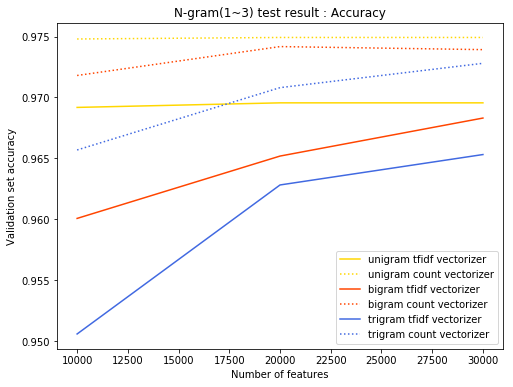

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 93.01%
model is 42.22% more accurate than null accuracy
train and test time: 0.44s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 93.06%
model is 42.27% more accurate than null accuracy
train and test time: 0.38s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 93.06%
model is 42.27% more accurate than null accuracy
train and test time: 0.39s
--------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Test result for 10000 features
null accuracy: 50.80%
accuracy score: 91.60%
model is 40.81% more accurate than null accuracy
train and test time: 0.78s
---------------------------

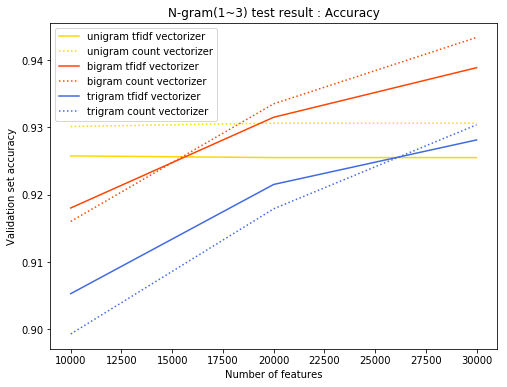

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
nb = MultinomialNB()
#svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators='warn', n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


Test result for 10000 features


C:\Users\raghu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


null accuracy: 50.80%
accuracy score: 96.11%
model is 45.31% more accurate than null accuracy
train and test time: 1.99s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 50.80%
accuracy score: 96.54%
model is 45.75% more accurate than null accuracy
train and test time: 1.19s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 50.80%
accuracy score: 96.18%
model is 45.38% more accurate than null accuracy
train and test time: 1.22s
--------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_wei

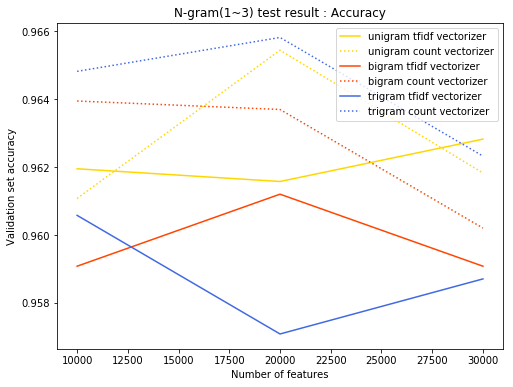

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
        null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
    else:
        null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
#svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer(input='X_train', analyzer='word',
                     min_df = 0, stop_words = 'english', sublinear_tf=False,smooth_idf=True)
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


Test result for 10000 features
null accuracy: 12.54%
accuracy score: 98.18%
model is 85.64% more accurate than null accuracy
train and test time: 27.87s
--------------------------------------------------------------------------------
Test result for 20000 features
null accuracy: 12.54%
accuracy score: 98.14%
model is 85.60% more accurate than null accuracy
train and test time: 27.68s
--------------------------------------------------------------------------------
Test result for 30000 features
null accuracy: 12.54%
accuracy score: 98.14%
model is 85.60% more accurate than null accuracy
train and test time: 27.96s
--------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight='balance

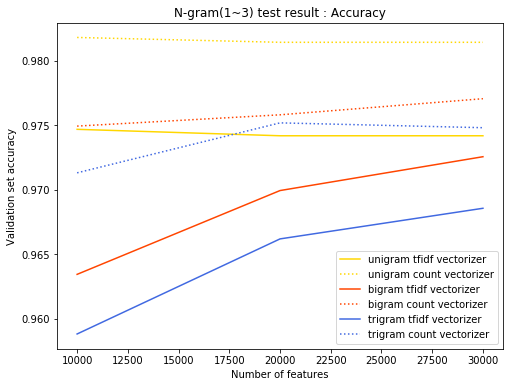

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import matplotlib.pyplot as plt

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == -1]) / (len(x_test)*1.) > 0.005:
        null_accuracy = len(x_test[y_test == -1]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
#lr = LogisticRegression()
#rf = RandomForestClassifier(class_weight="balanced")
#nb = MultinomialNB()
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=svc):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

cv = CountVectorizer()

feature_result_ug = nfeature_accuracy_checker(vectorizer=cv)
feature_result_bg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 2))
feature_result_tg = nfeature_accuracy_checker(vectorizer=cv,ngram_range=(1, 3))
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

tfidf = TfidfVectorizer()
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tfidf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))

plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')

plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')

plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()